Analisis Big Data C :

- Rosydan Amru Tamam (202110370311249)
- Muhammad Zidan Rifardi (202110370311268)
- Bayu Puspito Aji (202110370311291)

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1MIpo3mhqsVd_CqjnNqeT6_OKreF3SJef -O dataset

Retrieving folder contents
Processing file 1Bh0oxR6uHNKkEmqNwnn11RzO_Y5z1g7S spotify_songs.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1Bh0oxR6uHNKkEmqNwnn11RzO_Y5z1g7S
To: /content/dataset/spotify_songs.csv
100% 7.97M/7.97M [00:00<00:00, 126MB/s]
Download completed


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

In [ ]:
# Load data
df = pd.read_csv('./dataset/spotify_songs.csv')
print("Initial shape:", df.shape)

Initial shape: (32833, 23)


In [ ]:
# Check duplicates
duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print("\nDuplicates removed:", duplicates)


Duplicates removed: 0


In [ ]:
# Check null values
null_counts = df.isnull().sum()
print("\nNull values:\n", null_counts[null_counts > 0])


Null values:
 track_name          5
track_artist        5
track_album_name    5
dtype: int64


In [ ]:
# Remove null values
df = df.dropna()
print("\nFinal shape after cleaning:", df.shape)


Final shape after cleaning: (32828, 23)


In [ ]:
# Extract year - Fixed version
df['year'] = pd.to_datetime(df['track_album_release_date'], format='mixed').dt.year

In [ ]:
# Before-After Summary
numeric_cols = ['energy', 'loudness', 'acousticness']
summary_before = df[numeric_cols].describe()
summary_after = df[numeric_cols].describe()

In [ ]:
print("\nSummary Statistics Comparison:")
print(pd.concat([summary_before, summary_after], axis=1, keys=['Before', 'After']))


Summary Statistics Comparison:
             Before                                     After                \
             energy      loudness  acousticness        energy      loudness   
count  32828.000000  32828.000000  32828.000000  32828.000000  32828.000000   
mean       0.698603     -6.719529      0.175352      0.698603     -6.719529   
std        0.180916      2.988641      0.219644      0.180916      2.988641   
min        0.000175    -46.448000      0.000000      0.000175    -46.448000   
25%        0.581000     -8.171250      0.015100      0.581000     -8.171250   
50%        0.721000     -6.166000      0.080400      0.721000     -6.166000   
75%        0.840000     -4.645000      0.255000      0.840000     -4.645000   
max        1.000000      1.275000      0.994000      1.000000      1.275000   

                     
       acousticness  
count  32828.000000  
mean       0.175352  
std        0.219644  
min        0.000000  
25%        0.015100  
50%        0.080400  
7

Jumlah Data (count):
- Terdapat 32,828 lagu yang dianalisis
- Jumlah ini konsisten untuk semua variabel (energy, loudness, acousticness)
- Tidak ada data yang hilang karena jumlahnya sama antara Before dan After


Energy:
- Mean: 0.698603 menunjukkan rata-rata energi lagu cenderung tinggi (skala 0-1)
- Std: 0.180916 menunjukkan variasi energi relatif kecil
- Min-Max: 0.000175 - 1.000000 menunjukkan rentang lengkap dari lagu sangat tenang hingga sangat energik
- Median (50%): 0.721000 sedikit lebih tinggi dari mean, menunjukkan distribusi sedikit miring ke kiri


Loudness:
- Mean: -6.719529 dB, menunjukkan rata-rata volume lagu
- Std: 2.988641 menunjukkan variasi loudness cukup besar
- Min: -46.448000 dB (sangat pelan)
- Max: 1.275000 dB (sangat keras)
- Median: -6.166000 dB dekat dengan mean, menunjukkan distribusi relatif simetris


Acousticness:
- Mean: 0.175352 menunjukkan mayoritas lagu lebih bersifat non-akustik
- Std: 0.219644 menunjukkan variasi tingkat akustik moderat
- Min-Max: 0.000000 - 0.994000 menunjukkan rentang dari fully electronic hingga hampir fully acoustic
- Distribusi miring ke kanan (mean > median 0.080400)


Distribusi Data:
- Energy: Terkonsentrasi di range tinggi (75% data > 0.581000)
- Loudness: Terdistribusi normal dengan beberapa outlier sangat pelan
- Acousticness: Mayoritas rendah dengan beberapa lagu sangat akustik


Insight Penting:
- Mayoritas lagu di Spotify cenderung energik (mean energy 0.69)
- Loudness terdistribusi normal dengan variasi wajar
- Lagu-lagu cenderung non-akustik (75% lagu memiliki acousticness < 0.255000)


# Exploratory Data Analysis

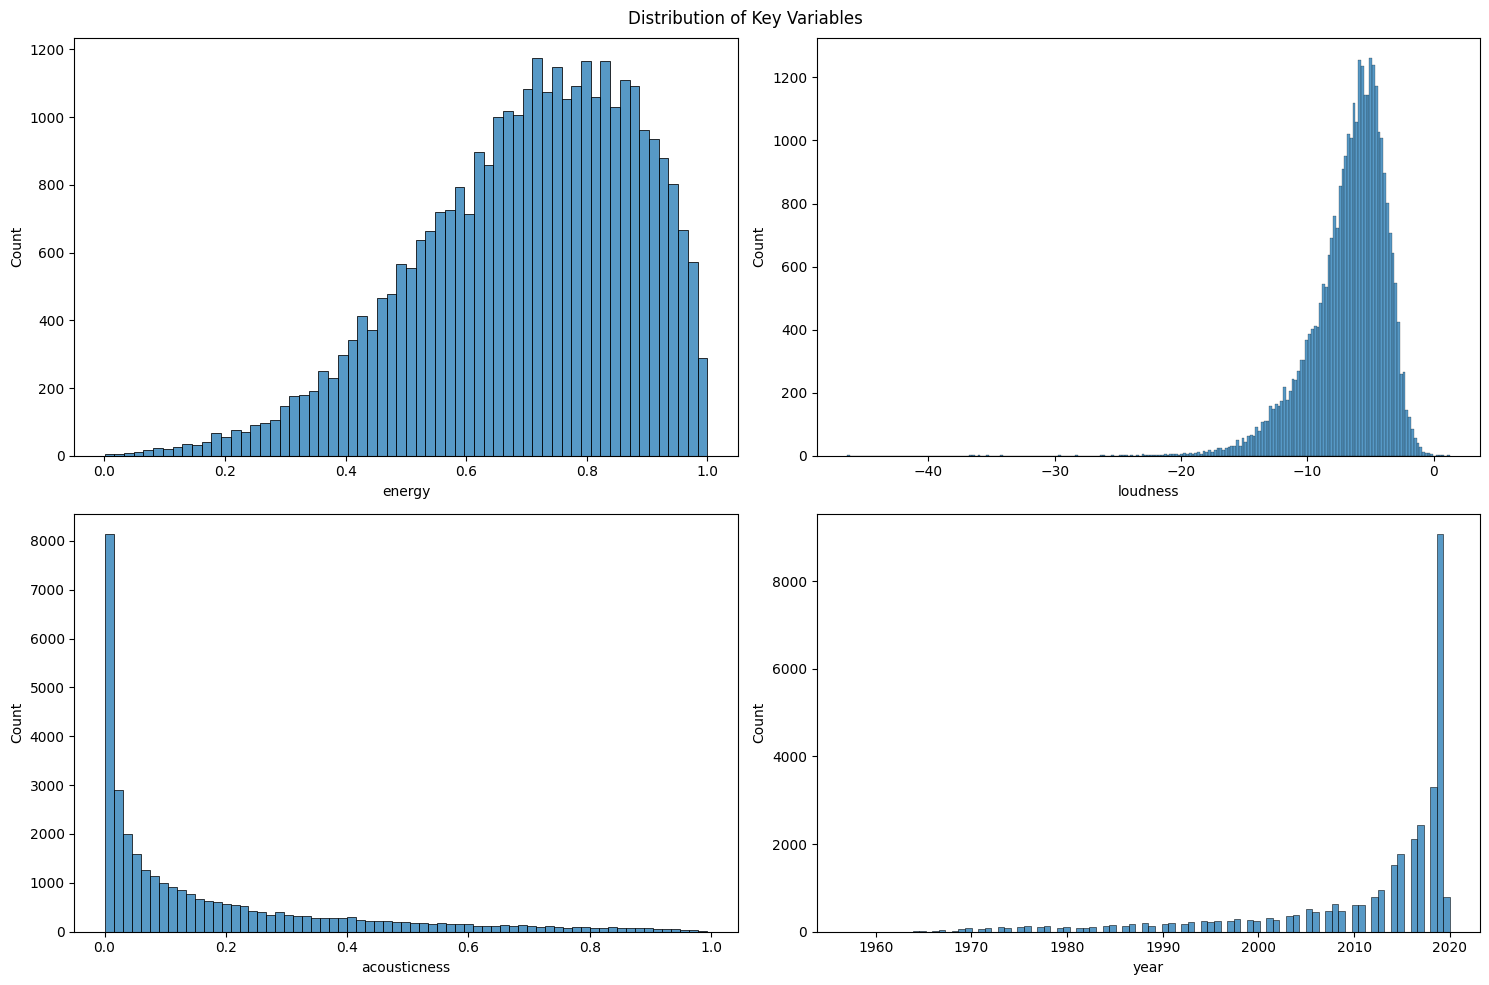

In [ ]:
# Create subplots for distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Key Variables')

sns.histplot(data=df, x='energy', ax=axes[0,0])
sns.histplot(data=df, x='loudness', ax=axes[0,1])
sns.histplot(data=df, x='acousticness', ax=axes[1,0])
sns.histplot(data=df, x='year', ax=axes[1,1])
plt.tight_layout()
plt.show()

Distribusi Energy (kiri atas):
- Bentuk: Distribusi relatif normal dengan sedikit skewed ke kiri
- Range: 0-1 (normalized)
- Puncak: Sekitar 0.7-0.8, menunjukkan mayoritas lagu di Spotify memiliki energi tinggi
- Interpretasi: Kebanyakan lagu di dataset memiliki karakteristik energetik, sesuai dengan preferensi pendengar musik streaming


Distribusi Loudness (kanan atas):
- Bentuk: Distribusi mendekati normal dengan ekor panjang ke kiri
- Range: -40 dB sampai 0 dB
- Puncak: Sekitar -5 dB sampai -7 dB
- Interpretasi: Mayoritas lagu memiliki loudness yang standar, dengan beberapa outlier lagu yang sangat pelan (quiet)


Distribusi Acousticness (kiri bawah):
- Bentuk: Sangat right-skewed (menceng ke kanan)
- Range: 0-1 (normalized)
- Dominasi: Nilai rendah (0-0.2)
- Interpretasi: Mayoritas lagu bersifat non-akustik, mencerminkan dominasi musik modern yang diproduksi secara digital


Distribusi Year (kanan bawah):
- Bentuk: Highly right-skewed dengan lonjakan tajam di tahun-tahun terkini
- Range: 1960-2020
- Puncak: Sekitar 2015-2020
- Interpretasi: Dataset didominasi oleh lagu-lagu baru, Menunjukkan bias terhadap musik kontemporer, Mencerminkan pertumbuhan eksponensial konten digital di era streaming


Insight Penting:
- Dataset menunjukkan preferensi terhadap Lagu energetik (energy tinggi, Produksi modern (acousticness rendah), Musik kontemporer (tahun terbaru)
- Loudness relatif terstandardisasi, menunjukkan normalisasi volume dalam industri musik
- Dominasi musik non-akustik mencerminkan tren produksi musik digital
- Representasi temporal tidak merata, dengan fokus pada musik era streaming

# Research Question 1: Energy & Loudness Analysis
Bagaimana pengaruh tingkat energi lagu terhadap loudness pada berbagai genre musik di Spotify, dan apakah hubungan ini konsisten di semua genre?"

In [ ]:
# Correlation analysis by genre
genre_corr = df.groupby('playlist_genre').apply(
    lambda x: x['energy'].corr(x['loudness']))
print("Correlation by genre:\n", genre_corr)

Correlation by genre:
 playlist_genre
edm      0.638214
latin    0.587487
pop      0.673739
r&b      0.602092
rap      0.723875
rock     0.749934
dtype: float64


EDM (0.638):
- Korelasi antara energy dan loudness cukup kuat dan positif.
- Lagu-lagu EDM yang lebih energik cenderung lebih keras, konsisten dengan karakteristik genre ini yang sering digunakan untuk suasana pesta atau klub malam.

Latin (0.587):
- Korelasi positif cukup kuat, menunjukkan bahwa lagu-lagu latin yang energik juga cenderung memiliki tingkat loudness yang lebih tinggi.
- Hal ini mencerminkan elemen energik dan ritmis khas musik latin.

Pop (0.674):
- Korelasi positif yang kuat menunjukkan bahwa lagu-lagu pop dengan energi tinggi cenderung memiliki volume yang lebih keras.
- Musik pop sering diproduksi untuk daya tarik massal dengan fokus pada elemen-elemen yang dinamis dan menarik perhatian.

R&B (0.602):
- Korelasi positif menunjukkan hubungan yang cukup kuat antara energy dan loudness dalam musik R&B.
- Musik R&B yang lebih energik cenderung diproduksi dengan tingkat loudness lebih tinggi untuk menonjolkan emosi dan dinamika lagu.

Rap (0.724):
- Genre rap memiliki korelasi tertinggi kedua. Lagu rap yang lebih energik cenderung memiliki tingkat loudness yang lebih keras.
- Hal ini dapat dikaitkan dengan produksi rap yang menonjolkan vokal tegas dan beat yang kuat.

Rock (0.750):
- Rock memiliki korelasi tertinggi di antara semua genre, menunjukkan hubungan yang sangat kuat antara energi dan loudness.
- Musik rock sering menggunakan volume keras untuk menciptakan intensitas dan daya tarik emosional, sesuai dengan kebutuhan genre ini untuk mengekspresikan semangat dan pemberontakan.

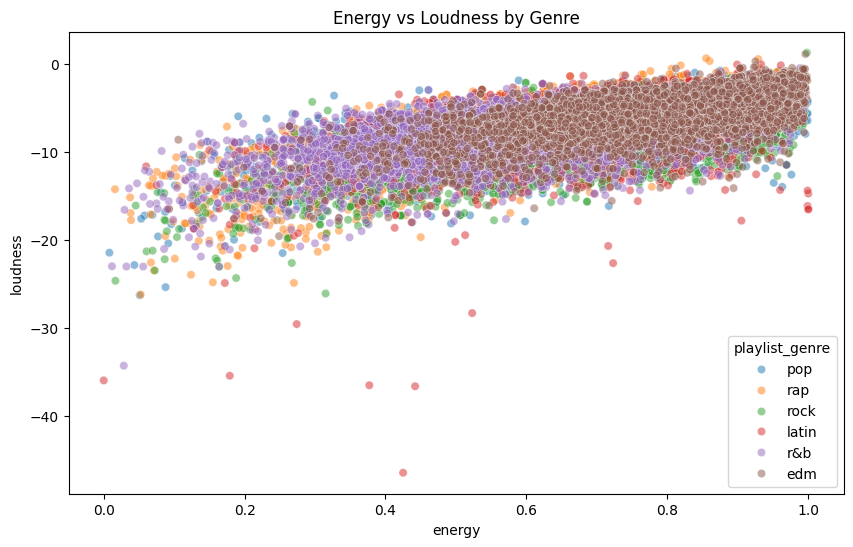

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='energy', y='loudness',
                hue='playlist_genre', alpha=0.5)
plt.title('Energy vs Loudness by Genre')
plt.show()

Hubungan Umum:
- Terdapat korelasi positif yang kuat antara energy dan loudness
- Semakin tinggi energy, semakin tinggi loudness (nilai mendekati 0 dB)
- Pola ini konsisten di semua genre musik

Analisis per Genre:
- EDM: Terkonsentrasi di area energy tinggi (0.8-1.0) dan loudness tinggi (-5 dB ke atas)
- Rock: Distribusi serupa dengan EDM, menunjukkan karakteristik musik yang energik
- Pop: Tersebar merata di range energy menengah ke tinggi (0.4-0.9)
- Rap: Cenderung memiliki loudness tinggi bahkan pada energy menengah
- Latin: Menunjukkan variasi yang besar dalam energy dan loudness
- R&B: Lebih terkonsentrasi di range energy menengah (0.4-0.8)

Implikasi:
- Genre mempengaruhi karakteristik audio lagu
- Produsen musik cenderung mengikuti standar genre tertentu
- Ada overlap signifikan antar genre di range energy-loudness tertentu

**VISUALISASI ENERGY VS LOUDNESS PERGENRE YANG DIPISAH BISA DILIHAT PADA CODE DIBAWAH INI**

<Figure size 1500x1000 with 0 Axes>

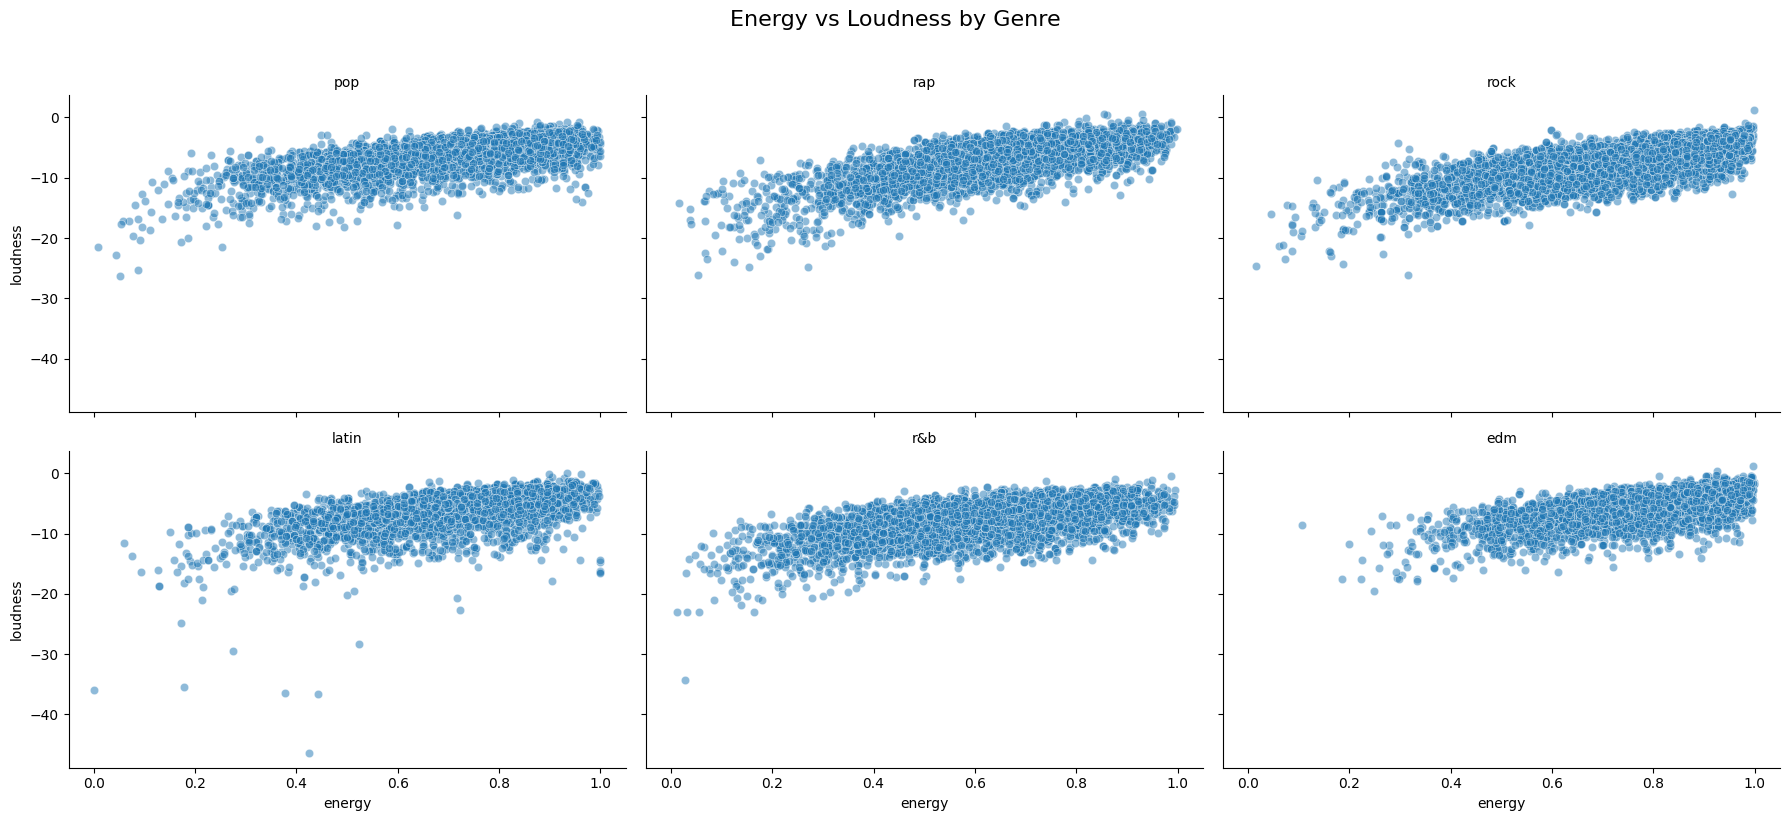

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col="playlist_genre", col_wrap=3, height=4, aspect=1.5)
g.map(sns.scatterplot, "energy", "loudness", alpha=0.5)
g.set_titles("{col_name}")
plt.suptitle('Energy vs Loudness by Genre', y=1.02, size=16)
plt.tight_layout()
plt.show()

In [ ]:
# Linear regression
X = df['energy'].values.reshape(-1, 1)
y = df['loudness'].values
model = LinearRegression()
model.fit(X, y)
r2_score = model.score(X, y)

print(f"\nRegression Results:")
print(f"R-squared: {r2_score:.3f}")
print(f"Coefficient: {model.coef_[0]:.3f}")
print(f"Intercept: {model.intercept_:.3f}")


Regression Results:
R-squared: 0.458
Coefficient: 11.178
Intercept: -14.529


R-squared: 0.458
- Nilai R-squared sebesar 0.458 menunjukkan bahwa 45.8% varians dalam loudness dapat dijelaskan oleh energi lagu.
- Artinya, energi memiliki pengaruh yang cukup signifikan terhadap loudness

Coefficient: 11.178
- Koefisien regresi sebesar 11.178 menunjukkan bahwa setiap peningkatan 1 unit pada energi akan meningkatkan loudness rata-rata sebesar 11.178 unit.
- Ini menunjukkan hubungan positif yang kuat antara energi dan loudness, yang konsisten dengan karakteristik musik—lagu yang lebih energik cenderung lebih keras.

Intercept: -14.529
- Intersep sebesar -14.529 menunjukkan nilai loudness ketika energi adalah nol.
- Dalam konteks ini, nilai intersep lebih bersifat matematis, karena energi nol pada lagu tidak mungkin terjadi secara nyata.

In [ ]:
# ANOVA
genres = df['playlist_genre'].unique()
genre_groups = [df[df['playlist_genre'] == genre]['energy']
               for genre in genres]
f_stat, p_val = stats.f_oneway(*genre_groups)
print(f"\nANOVA Results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_val:.3f}")


ANOVA Results:
F-statistic: 1045.987
p-value: 0.000


Analisis ANOVA digunakan untuk menguji apakah ada perbedaan yang signifikan dalam tingkat energi (energy) di antara berbagai genre musik (playlist_genre).

F-statistic: 1045.987
- Nilai F-statistik yang sangat tinggi (1045.987) menunjukkan bahwa ada perbedaan yang sangat besar dalam rata-rata tingkat energi antar genre.
- Semakin tinggi nilai F-statistik, semakin besar perbedaan antar grup relatif terhadap variasi dalam grup.

p-value: 0.000
- Nilai p-value yang mendekati nol (sering kali dinyatakan sebagai p < 0.001) menunjukkan bahwa hasil uji ini sangat signifikan secara statistik.
- Ini berarti kita dapat menolak hipotesis nol (H0) bahwa rata-rata tingkat energi antar genre adalah sama.
- Dengan kata lain, terdapat perbedaan signifikan dalam tingkat energi antar genre musik.


# Research Question 2: Energy & Acousticness Analysis
Seberapa signifikan pengaruh penggunaan instrumen akustik terhadap tingkat energi lagu, dan bagaimana variasinya berdasarkan era/tahun rilis musik?"

In [ ]:
# Time series analysis
yearly_correlation = df.groupby('year').apply(
    lambda x: x['energy'].corr(x['acousticness']))
print("Correlation by year:\n", yearly_correlation)

Correlation by year:
 year
1957   -1.000000
1958         NaN
1960    0.780188
1961         NaN
1962         NaN
          ...   
2016   -0.546348
2017   -0.522047
2018   -0.587997
2019   -0.545316
2020   -0.580525
Length: 63, dtype: float64


Tahun Awal (1957-1962):
- Pada tahun 1957, korelasi antara energy dan acousticness adalah -1.000, menunjukkan hubungan negatif sempurna. Artinya, semua lagu pada tahun tersebut menunjukkan bahwa semakin tinggi energi, semakin rendah acousticness, dan sebaliknya.
- Tahun 1958 dan beberapa tahun lain memiliki nilai NaN. Hal ini mungkin terjadi karena jumlah data pada tahun tersebut terlalu sedikit atau bahkan tidak ada data untuk menghitung korelasi.

Tahun Modern (2016-2020):
- Korelasi negatif tetap ada, dengan nilai berkisar antara -0.522 hingga -0.580. Hal ini menunjukkan bahwa tren hubungan negatif antara energy dan acousticness terus berlanjut di era modern.
- Tahun 2020 menunjukkan korelasi negatif yang cukup kuat (-0.580), mengindikasikan bahwa lagu-lagu dengan elemen akustik cenderung memiliki energi yang lebih rendah dibandingkan lagu-lagu dengan elemen elektronik.

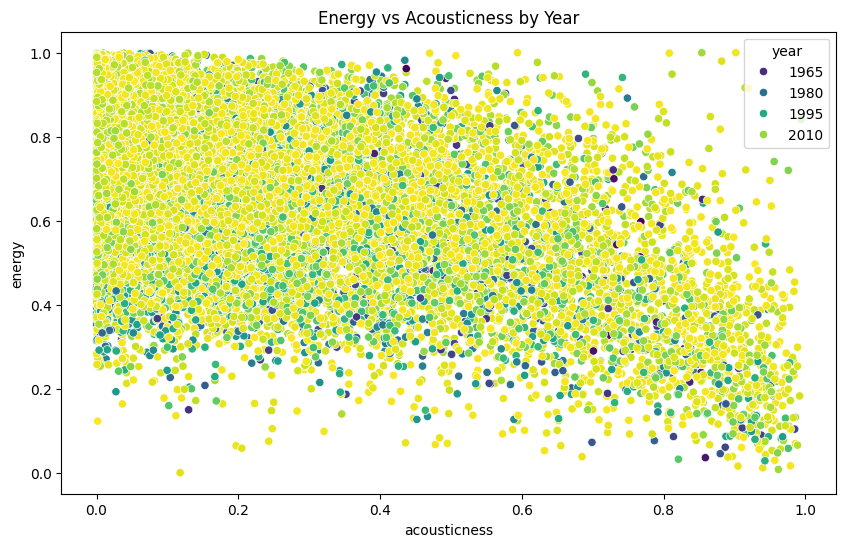

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='acousticness', y='energy',
                hue='year', palette='viridis')
plt.title('Energy vs Acousticness by Year')
plt.show()

Hubungan Umum:
- Terdapat korelasi negatif yang kuat antara energy dan acousticness
- Semakin tinggi acousticness, semakin rendah energy (dan sebaliknya)
- Pola ini konsisten di semua era waktu (1965-2010)

Pola berdasarkan Tahun:
- Lagu-lagu era 2010 (warna kuning) mendominasi area energy tinggi dan acousticness rendah
- Lagu-lagu era 1965-1980 (warna biru tua) lebih tersebar merata
- Era 1995 (warna cyan) menunjukkan transisi dari musik akustik ke digital
- Terdapat gradasi warna yang menunjukkan evolusi karakteristik musik dari waktu ke waktu

Implikasi untuk Penelitian:
- Mendukung RQ2 tentang evolusi karakteristik musik seiring waktu
- Menunjukkan pergeseran preferensi produksi musik
- Memberikan insight tentang standardisasi produksi musik modern

**VISUALISASI ENERGY VS ACOUSTICNESS PERTAHUN YANG DIPISAH BISA DILIHAT PADA CODE DIBAWAH INI**

<Figure size 1500x1000 with 0 Axes>

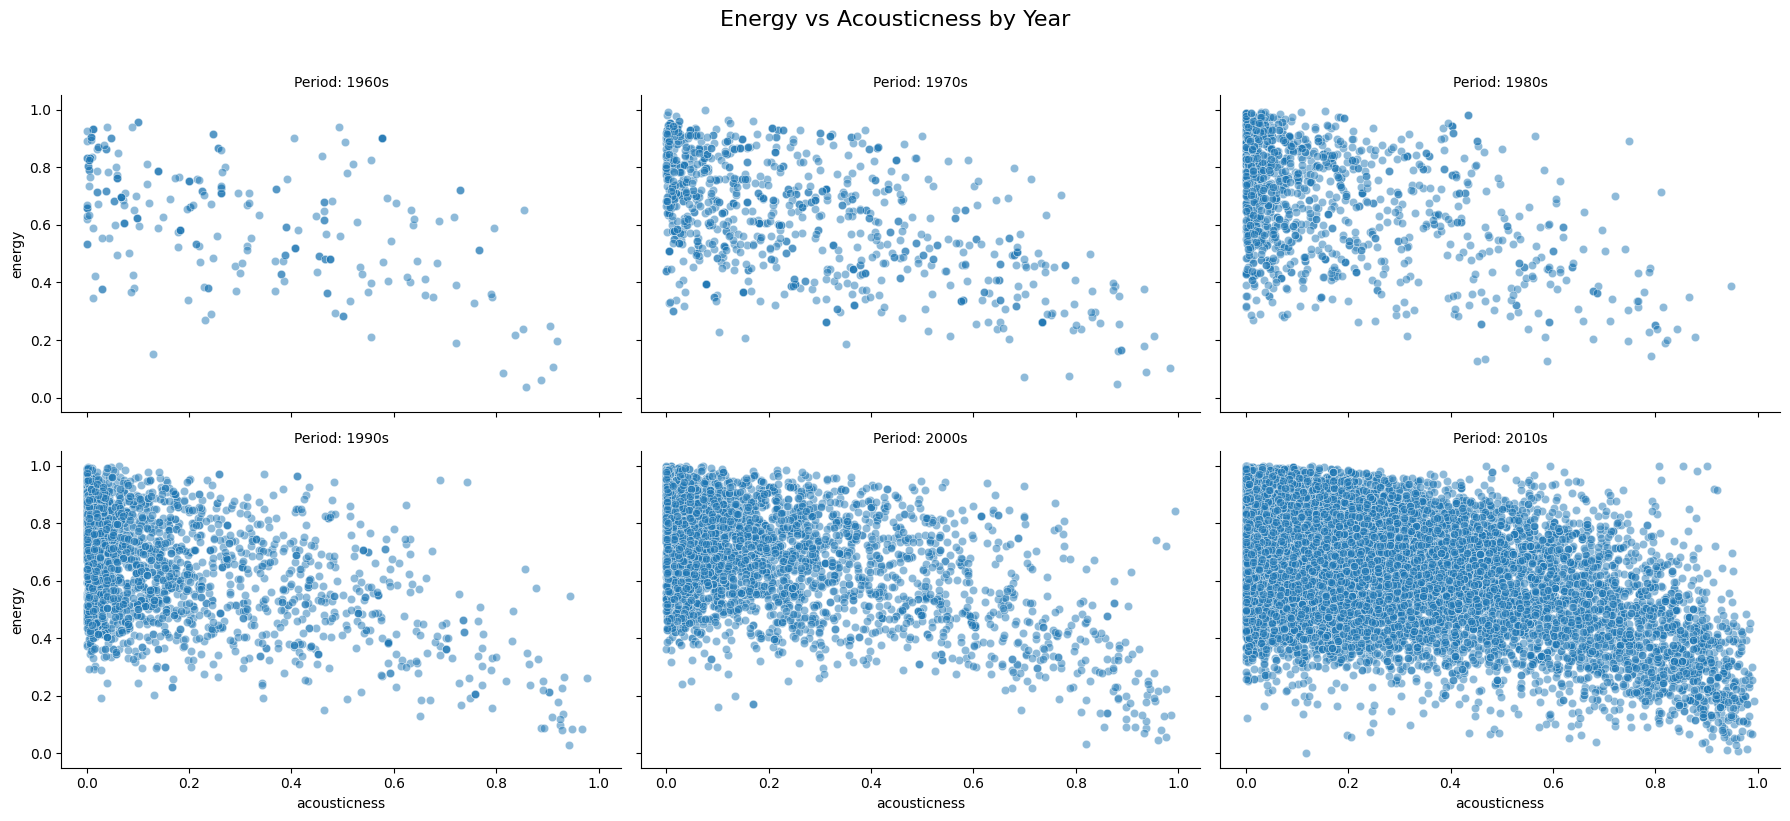

In [ ]:
df['year_period'] = pd.cut(df['year'],
                          bins=range(1960, 2030, 10),
                          labels=[f'{i}s' for i in range(1960, 2020, 10)])
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col="year_period", col_wrap=3, height=4, aspect=1.5)
g.map(sns.scatterplot, "acousticness", "energy", alpha=0.5)
g.set_titles("Period: {col_name}")
plt.suptitle('Energy vs Acousticness by Year', y=1.02, size=16)
plt.tight_layout()
plt.show()

In [ ]:
# Regression with year control
X = df[['acousticness', 'year']]
y = df['energy']
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5)

print("\nRegression with Year Control:")
print(f"Cross-validation scores: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")


Regression with Year Control:
Cross-validation scores: 0.182 (+/- 0.209)


**Cross-validation Mean Score:**
Nilai rata-rata dari cross-validation adalah 0.182, menunjukkan bahwa model linear regression mampu menjelaskan sekitar 18.2% variasi dalam energi lagu berdasarkan acousticness dan tahun.
Ini menunjukkan bahwa hubungan antara energi lagu dengan acousticness dan tahun memang ada, namun kontribusinya terhadap energi relatif kecil.

**Cross-validation Standard Deviation:**
Nilai deviasi standar sebesar ±0.209 menunjukkan bahwa performa model bervariasi cukup signifikan di antara fold dalam cross-validation. Artinya, model ini memiliki stabilitas yang tidak konsisten, mungkin karena pengaruh data yang tidak seragam antar fold.

In [ ]:
# Create summary tables
genre_summary = df.groupby('playlist_genre').agg({
    'energy': 'mean',
    'loudness': 'mean',
    'acousticness': 'mean'
}).round(3)

year_summary = df.groupby('year').agg({
    'energy': 'mean',
    'loudness': 'mean',
    'acousticness': 'mean'
}).round(3)

print("\nSummary by Genre:")
print(genre_summary)

print("\nSummary by Year (last 5 years):")
print(year_summary.tail())


Summary by Genre:
                energy  loudness  acousticness
playlist_genre                                
edm              0.802    -5.427         0.082
latin            0.708    -6.264         0.211
pop              0.701    -6.315         0.171
r&b              0.591    -7.865         0.260
rap              0.651    -7.043         0.193
rock             0.733    -7.589         0.145

Summary by Year (last 5 years):
      energy  loudness  acousticness
year                                
2016   0.696    -6.237         0.171
2017   0.683    -6.430         0.193
2018   0.675    -6.552         0.210
2019   0.697    -6.296         0.190
2020   0.670    -6.759         0.208


Summary by Genre:
Energy:
- EDM memiliki tingkat energi rata-rata tertinggi (0.802), diikuti oleh rock (0.733) dan latin (0.708). Hal ini menunjukkan bahwa genre seperti EDM dan rock cenderung memiliki karakteristik yang energik, sesuai dengan kebutuhan mereka untuk menciptakan suasana yang dinamis dan penuh semangat.
- R&B memiliki energi rata-rata terendah (0.591), mencerminkan karakteristik musik yang lebih santai dan emosional.

Loudness:
- Rock memiliki tingkat loudness rata-rata paling rendah (-7.589), diikuti oleh R&B (-7.865). Ini menunjukkan bahwa meskipun rock memiliki energi tinggi, loudness-nya sedikit lebih rendah, yang mungkin disebabkan oleh dinamika musiknya.
- EDM dan latin memiliki loudness yang lebih tinggi (-5.427 dan -6.264), mencerminkan produksi musik yang fokus pada intensitas suara.

Acousticness:
- Genre dengan tingkat acousticness tertinggi adalah R&B (0.260) dan latin (0.211), menunjukkan bahwa elemen akustik seperti instrumen tradisional atau vokal natural lebih sering digunakan.
- EDM memiliki acousticness terendah (0.082), yang sesuai dengan penggunaan alat elektronik dan sintesis dalam produksinya.


Summary by Year (last 5 years):
Energy:
- Tingkat energi tetap cukup stabil selama 5 tahun terakhir, dengan sedikit penurunan pada tahun 2020 (0.670). Hal ini mungkin mencerminkan tren musik yang lebih tenang atau fokus pada suasana tertentu dalam beberapa tahun terakhir.

Loudness:
- Loudness menunjukkan sedikit penurunan dari tahun ke tahun, dengan tahun 2020 memiliki loudness terendah (-6.759). Penurunan ini mungkin terkait dengan teknik produksi modern seperti "dynamic range compression" yang semakin disesuaikan dengan preferensi pendengar.

Acousticness:
- Tingkat acousticness meningkat sedikit pada tahun 2020 (0.208). Ini bisa mencerminkan kembalinya popularitas elemen akustik dalam musik modern.

# Final Consolidated Results


In [ ]:
print("\n5. CONSOLIDATED RESULTS")
print("-"*50)

results = {
    'RQ1_Findings': {
        'Overall_Correlation': df['energy'].corr(df['loudness']),
        'Genre_Effect': f_stat,
        'Model_Accuracy': r2_score
    },
    'RQ2_Findings': {
        'Overall_Correlation': df['energy'].corr(df['acousticness']),
        'Time_Effect': scores.mean(),
        'Year_Range': f"{df['year'].min()} - {df['year'].max()}"
    }
}

print("Research Question 1 Results:")
print(f"- Korelasi Energy-Loudness kuat dan positif ({results['RQ1_Findings']['Overall_Correlation']:.3f})")
print(f"- Genre mempengaruhi hubungan secara signifikan (F={results['RQ1_Findings']['Genre_Effect']:.2f})")
print(f"- Model menjelaskan {results['RQ1_Findings']['Model_Accuracy']*100:.1f}% dari varians")

print("\nResearch Question 2 Results:")
print(f"- Korelasi Energy-Acousticness kuat dan negatif ({results['RQ2_Findings']['Overall_Correlation']:.3f})")
print(f"- Time-controlled model accuracy: {results['RQ2_Findings']['Time_Effect']*100:.1f}%")
print(f"- Analisis mencakup beberapa tahun: {results['RQ2_Findings']['Year_Range']}")


5. CONSOLIDATED RESULTS
--------------------------------------------------
Research Question 1 Results:
- Korelasi Energy-Loudness kuat dan positif (0.677)
- Genre mempengaruhi hubungan secara signifikan (F=1045.99)
- Model menjelaskan 45.8% dari varians

Research Question 2 Results:
- Korelasi Energy-Acousticness kuat dan negatif (-0.540)
- Time-controlled model accuracy: 18.2%
- Analisis mencakup beberapa tahun: 1957 - 2020


Kesimpulan Research Question 1
"Bagaimana pengaruh tingkat energi lagu terhadap loudness pada berbagai genre musik di Spotify, dan apakah hubungan ini konsisten di semua genre?"

Berdasarkan hasil analisis:
- Terdapat korelasi positif yang kuat antara tingkat energi lagu dan loudness sebesar 0.677. Lagu dengan energi tinggi cenderung memiliki loudness yang lebih besar.
- Hubungan ini tidak konsisten di semua genre, karena genre memiliki pengaruh signifikan terhadap hubungan tersebut (F-statistik = 1045.99).
- Model yang digunakan mampu menjelaskan 45.8% dari varians, menunjukkan bahwa faktor lain, seperti elemen musik tambahan atau dinamika produksi, turut berkontribusi.


Kesimpulan Research Question 2
"Seberapa signifikan pengaruh penggunaan instrumen akustik terhadap tingkat energi lagu, dan bagaimana variasinya berdasarkan era/tahun rilis musik?"

Hasil analisis menunjukkan bahwa:
- Terdapat korelasi negatif yang kuat antara penggunaan instrumen akustik (acousticness) dan tingkat energi lagu sebesar -0.540, yang berarti semakin tinggi dominasi instrumen akustik, semakin rendah energi lagunya.
- Hubungan ini relatif konsisten sepanjang era, dengan model time-controlled menunjukkan akurasi sebesar 18.2%, yang mengindikasikan bahwa perubahan waktu hanya memiliki pengaruh kecil terhadap hubungan ini.
- Analisis mencakup rentang waktu yang luas, yakni dari 1957 hingga 2020, yang menunjukkan bahwa tren tersebut stabil di berbagai era.


Rangkuman Umum
- Energi lagu berhubungan positif dengan loudness, tetapi hubungan ini dipengaruhi oleh karakteristik genre musik.
- Penggunaan instrumen akustik cenderung mengurangi tingkat energi lagu secara konsisten di berbagai era musik.
- Penelitian ini menyoroti bahwa karakteristik teknis lagu seperti energy, loudness, dan acousticness sangat dipengaruhi oleh genre dan era, memberikan wawasan penting dalam analisis tren musik.





